<a href="https://colab.research.google.com/github/ferdinann/DataScience/blob/main/StudyPath_MultiOutputDNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import library

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
#!pip install optuna
#import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


##Get Dataset

In [ ]:
df = pd.read_csv('data-final.csv', delimiter='\t')

##Cleaning and selected Dataset


In [ ]:
df.drop(df.columns[50:], axis=1, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


##Data Information

In [ ]:
df.describe(include='all')

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,...,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06
mean,2.652471e+00,2.779167e+00,3.296210e+00,3.148363e+00,3.284682e+00,2.405548e+00,2.777389e+00,3.423722e+00,2.970390e+00,3.565924e+00,...,3.664151e+00,2.078861e+00,4.011187e+00,2.002415e+00,3.803242e+00,1.896757e+00,3.987420e+00,3.190272e+00,4.134585e+00,3.969365e+00
std,1.258897e+00,1.318125e+00,1.205135e+00,1.228714e+00,1.268462e+00,1.220572e+00,1.395087e+00,1.261760e+00,1.339349e+00,1.294468e+00,...,1.143767e+00,1.107473e+00,1.079427e+00,1.085010e+00,9.742203e-01,1.099323e+00,9.890028e-01,1.246604e+00,1.020795e+00,1.015893e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,5.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [ ]:
df.isnull().sum()

,0
EXT1,0
EXT2,0
EXT3,0
EXT4,0
EXT5,0
EXT6,0
EXT7,0
EXT8,0
EXT9,0
EXT10,0


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    #print(f"Kolom {column} memiliki nilai unik: {unique_values}")

In [ ]:
all_unique_values = np.unique(df.values)
print(f"Semua nilai unik di Data: {all_unique_values}")

Semua nilai unik di Data: [0. 1. 2. 3. 4. 5.]


In [ ]:
#Menganti Nilai 0 dengan Nilai yang sering muncul

df = df.replace(0, np.nan)
df = df.apply(lambda column: column.fillna(column.mode()[0]))

In [ ]:
new_value = np.unique(df.values)
print(new_value)

[1. 2. 3. 4. 5.]


##Formula for big five score calculation
###n = nilai dari feature
1. EXT = 20 + n0 - n1 + n2 - n3 + n4 - n5 + n6 - n7 + n8 - n9
2. EST = 38 - n10 + n11 - n12 + ... - n19
3. AGR = 14 - n20 + n21 - n22 + ... - n29
4. CSN = 14 + n30 - n31 + n32 + ... + n39
5. OPN = 8 + n40 - n41 + n42 + ... + n49  


##Add target feature column EXT

In [ ]:
columns_ext = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

result_ext= []

for index, row in df.iterrows():
    result = 20
    for i, col in enumerate(columns_ext):
        if i % 2 == 0:
            result += row.iloc[col]
        else:
            result -= row.iloc[col]
    result_ext.append(result)

result_ext = np.array(result_ext)
result_ext[result_ext == 0] = 1

print(result_ext)

[36. 10. 15. ... 29. 12. 29.]


##Add Feature column EST

In [ ]:
columns_est = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

result_est= []

for index, row in df.iterrows():
    result = 20
    for i, col in enumerate(columns_est):
        if i % 2 == 0:
            result -= row.iloc[col]
        else:
            result += row.iloc[col]
    result_est.append(result)

result_est = np.array(result_est)
result_est[result_est == 0] = 1

print(result_est)

[20. 13. 20. ... 13. 17. 15.]


##Add Feature AGR


In [ ]:
columns_agr = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

result_agr= []

for index, row in df.iterrows():
    result = 20
    for i, col in enumerate(columns_agr):
        if i % 2 == 0:
            result -= row.iloc[col]
        else:
            result += row.iloc[col]
    result_agr.append(result)

result_agr = np.array(result_agr)
result_agr[result_agr == 0] = 1


print(result_agr)

[29. 30. 30. ... 25. 25. 30.]


##Add Feature CSN

In [ ]:
columns_csn = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

result_csn= []

for index, row in df.iterrows():
    result = 20
    for i, col in enumerate(columns_csn):
        if i % 2 == 0:
            result += row.iloc[col]
        else:
            result -= row.iloc[col]
    result_csn.append(result)

result_csn = np.array(result_csn)
result_csn[result_csn == 0] = 1

print(result_csn)

[20. 27. 26. ...  7. 26. 18.]


##Add Feature OPN

In [ ]:
columns_opn = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

result_opn= []

for index, row in df.iterrows():
    result = 20
    for i, col in enumerate(columns_opn):
        if i % 2 == 0:
            result += row.iloc[col]
        else:
            result -= row.iloc[col]
    result_opn.append(result)

result_opn = np.array(result_opn)
result_opn[result_opn == 0] = 1

print(result_opn)

[31. 27. 29. ... 30. 27. 31.]


In [ ]:
unique_ext = np.unique(result_ext)
print(unique_ext)

unique_est = np.unique(result_est)
print(unique_est)

unique_agr = np.unique(result_agr)
print(unique_agr)

unique_csn = np.unique(result_csn)
print(unique_csn)

unique_opn = np.unique(result_opn)
print(unique_opn)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40.]


##Konversi 41 kategori ke Persen dan memisahkan data training dan data testing

In [ ]:
X = df.iloc[:,0 : 50]
print(X)

         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

         OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0   

In [ ]:
y_ext = np.array((result_ext*2.5/100), dtype=float)
y_ext = np.round(y_ext, decimals=2)

y_est = np.array((result_est*2.5/100), dtype=float)
y_est = np.round(y_est, decimals=2)

y_agr = np.array((result_agr*2.5/100), dtype=float)
y_agr = np.round(y_agr, decimals=2)

y_csn = np.array((result_csn*2.5/100), dtype=float)
y_csn = np.round(y_csn, decimals=2)

y_opn = np.array((result_opn*2.5/100), dtype=float)
y_opn = np.round(y_opn, decimals=2)

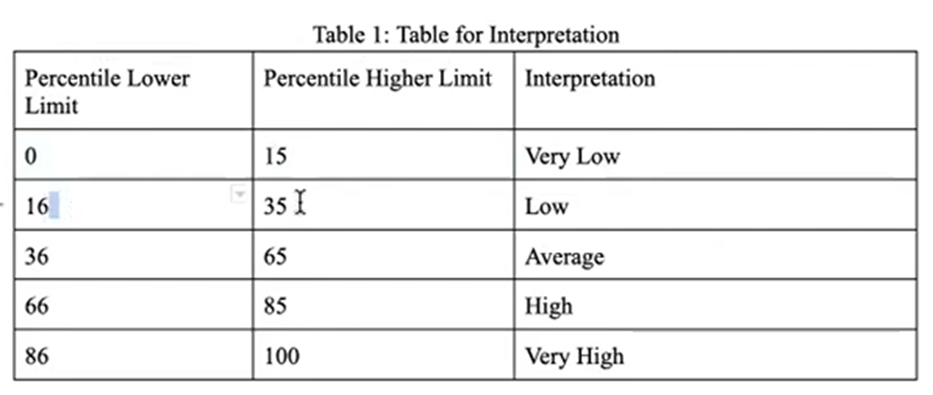

In [ ]:
print(np.unique(y_ext))

[0.02 0.05 0.08 0.1  0.12 0.15 0.18 0.2  0.22 0.25 0.28 0.3  0.32 0.35
 0.38 0.4  0.42 0.45 0.48 0.5  0.52 0.55 0.57 0.6  0.62 0.65 0.68 0.7
 0.72 0.75 0.78 0.8  0.82 0.85 0.88 0.9  0.92 0.95 0.98 1.  ]


In [ ]:
df['y_EXT'] = y_ext
df['y_EST'] = y_est
df['y_AGR'] = y_agr
df['y_CSN'] = y_csn
df['y_OPN'] = y_opn
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,y_EXT,y_EST,y_AGR,y_CSN,y_OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,5.0,3.0,4.0,5.0,0.90,0.50,0.72,0.50,0.78
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,4.0,2.0,5.0,3.0,0.25,0.32,0.75,0.68,0.68
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.0,5.0,3.0,4.0,4.0,0.38,0.50,0.75,0.65,0.72
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1.0,4.0,4.0,3.0,3.0,0.40,0.42,0.70,0.32,0.68
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,3.0,5.0,5.0,0.48,0.52,0.80,0.85,0.85


##Build Model

In [ ]:
def format_output(data):
    y1 = data.pop('y_EXT')
    y1 = np.array(y1)
    y2 = data.pop('y_EST')
    y2 = np.array(y2)
    y3 = data.pop('y_AGR')
    y3 = np.array(y3)
    y4 = data.pop('y_CSN')
    y4 = np.array(y4)
    y5 = data.pop('y_OPN')
    y5 = np.array(y5)
    return y1, y2, y3, y4, y5


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


In [ ]:
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

train_stats.pop('y_EXT')
train_stats.pop('y_EST')
train_stats.pop('y_AGR')
train_stats.pop('y_CSN')
train_stats.pop('y_OPN')

train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [ ]:
# Define model layers.
#'n_layers': 5, 'n_units_1': 97, 'n_units_2': 99, 'n_units_3': 118, 'n_units_4': 101, 'n_units_5': 195, '

input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units=128, activation='relu',kernel_regularizer=l2(0.01))(input_layer)
first_dense = Dropout(0.2)(first_dense)
second_dense = Dense(units=128, activation='relu')(first_dense)
second_dense = Dropout(0.2)(second_dense)

y1_output = Dense(units=1, name='y1_output')(second_dense)
third_dense = Dense(units=101, activation='relu', kernel_regularizer=l2(0.01))(second_dense)
third_dense = Dropout(0.2)(third_dense)

y2_output = Dense(units=1, name='y2_output')(third_dense)
four_dense = Dense(units=101, activation='relu', kernel_regularizer=l2(0.01))(third_dense)
four_dense = Dropout(0.2)(four_dense)

y3_output = Dense(units=1, name='y3_output')(four_dense)
five_dense = Dense(units=101, activation='relu', kernel_regularizer=l2(0.01))(four_dense)
five_dense = Dropout(0.2)(five_dense)

y4_output = Dense(units=1, name='y4_output')(five_dense)
six_dense = Dense(units=101, activation='relu', kernel_regularizer=l2(0.01))(five_dense)

y5_output = Dense(units=1, name='y5_output')(six_dense)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output, y4_output, y5_output])

print(model.summary())

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_47 (Dense)          │ (None, 128)            │          6,528 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense_47[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_48 (Dense)          │ (None, 128)            │         16,512 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_48[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_49 (Dense)          │ (None, 101)            │         13,029 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 101)            │              0 │ dense_49[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_50 (Dense)          │ (None, 101)            │         10,302 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 101)            │              0 │ dense_50[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 101)            │         10,302 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 101)            │              0 │ dense_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 101)            │         10,302 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 101)            │              0 │ dense_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y1_output (Dense)         │ (None, 1)              │            129 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y2_output (Dense)         │ (None, 1)              │            102 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y3_output (Dense)         │ (None, 1)              │            102 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y4_output (Dense)         │ (None, 1)              │            102 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y5_output (Dense)         │ (None, 1)              │            102 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 67,512 (263.72 KB)

 Trainable params: 67,512 (263.72 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Specify the optimizer, and compile the model with loss functions for both outputs
# learning_rate': 0.00010526134982467583, 'batch_size': 128, 'epochs': 31
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse', 'y3_output': 'mse', 'y4_output': 'mse', 'y5_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y3_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y4_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y5_output': tf.keras.metrics.RootMeanSquaredError()})


In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs=31, batch_size=128, validation_data=(norm_test_X, test_Y))

Epoch 1/31
6305/6305 ━━━━━━━━━━━━━━━━━━━━ 74s 11ms/step - loss: 0.4455 - y1_output_loss: 0.0132 - y1_output_root_mean_squared_error: 0.0997 - y2_output_loss: 0.0077 - y2_output_root_mean_squared_error: 0.0781 - y3_output_loss: 0.0121 - y3_output_root_mean_squared_error: 0.0987 - y4_output_loss: 0.0101 - y4_output_root_mean_squared_error: 0.0948 - y5_output_loss: 0.0152 - y5_output_root_mean_squared_error: 0.1197 - val_loss: 0.0187 - val_y1_output_loss: 4.6945e-04 - val_y1_output_root_mean_squared_error: 0.0217 - val_y2_output_loss: 4.8628e-04 - val_y2_output_root_mean_squared_error: 0.0221 - val_y3_output_loss: 8.9894e-04 - val_y3_output_root_mean_squared_error: 0.0300 - val_y4_output_loss: 0.0017 - val_y4_output_root_mean_squared_error: 0.0410 - val_y5_output_loss: 0.0102 - val_y5_output_root_mean_squared_error: 0.1010
Epoch 2/31
6305/6305 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - loss: 0.0227 - y1_output_loss: 0.0013 - y1_output_root_mean_squared_error: 0.0365 - y2_output_loss: 0.0012 - y

In [ ]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse, Y3_loss, Y4_loss, Y3_rmse, Y4_rmse, Y5_loss, Y5_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}, Y3_loss = {}, Y3_mse = {}, Y4_loss = {}, Y4_mse = {}, Y5_loss = {}, Y5_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse, Y3_loss, Y3_rmse, Y4_loss, Y4_rmse, Y5_loss, Y5_rmse))

6305/6305 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0171 - y1_output_loss: 0.0022 - y1_output_root_mean_squared_error: 0.0464 - y2_output_loss: 4.0876e-04 - y2_output_root_mean_squared_error: 0.0202 - y3_output_loss: 7.6232e-04 - y3_output_root_mean_squared_error: 0.0276 - y4_output_loss: 7.0042e-04 - y4_output_root_mean_squared_error: 0.0265 - y5_output_loss: 0.0102 - y5_output_root_mean_squared_error: 0.1009
Loss = 0.01712743751704693, Y1_loss = 0.0021543647162616253, Y1_mse = 0.0007608922896906734, Y2_loss = 0.0004088066634722054, Y2_mse = 0.000700510514434427, Y3_loss = 0.010191414505243301, Y3_mse = 0.0202189888805151, Y4_loss = 0.04641515016555786, Y4_mse = 0.027584215626120567, Y5_loss = 0.026467129588127136, Y5_mse = 0.10095251351594925


In [ ]:
array_float = np.random.uniform(low=1.0, high=5.0, size=50)
array_float = np.round(array_float, decimals=0)
array_float

array([1., 2., 4., 4., 3., 5., 2., 4., 3., 5., 5., 3., 3., 3., 3., 5., 3.,
       3., 4., 2., 2., 2., 2., 4., 4., 3., 1., 1., 4., 3., 5., 4., 2., 3.,
       4., 5., 4., 2., 3., 2., 4., 2., 3., 2., 1., 2., 5., 4., 1., 3.])

In [ ]:
test_data=array_float.reshape(1,-1)

In [ ]:
# test_data = scaler.transform(test_data)
prediction = model.predict(test_data)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[array([[0.29553324]], dtype=float32), array([[0.44541714]], dtype=float32), array([[0.5951614]], dtype=float32), array([[0.6281197]], dtype=float32), array([[0.6615943]], dtype=float32)]


In [ ]:
ext = (prediction[0][0][0]) * 100
est = (prediction[1][0][0]) * 100
agr = (prediction[2][0][0]) * 100
csn = (prediction[3][0][0]) * 100
opn = (prediction[4][0][0]) * 100

print(f"Prediksi Extroversion: {ext:.0f} %")
print(f"Prediksi Neuroticism: {est:.0f} %")
print(f"Prediksi Agreeable: {agr:.0f} %")
print(f"Prediksi Conscientious: {csn:.0f} %")
print(f"Prediksi Openness: {opn:.0f} %")

Prediksi Extroversion: 30 %
Prediksi Neuroticism: 45 %
Prediksi Agreeable: 60 %
Prediksi Conscientious: 63 %
Prediksi Openness: 66 %


In [ ]:
def evaluate_accuracy(model, norm_test_X, test_Y):
    """
    Evaluates and displays accuracy for each output
    """
    predictions = model.predict(norm_test_X)

    output_names = ['y_EXT', 'y_EST', 'y_AGR', 'y_CSN', 'y_OPN']

    print("\nModel Accuracy for Each Output:")
    print("-" * 40)

    for i, name in enumerate(output_names):
        r2 = r2_score(test_Y[i], predictions[i])

        rmse = np.sqrt(mean_squared_error(test_Y[i], predictions[i]))
        accuracy = max(0, (1 - rmse)) * 100
        print(f"{name}:")
        print(f"R2 Score: {r2:.4f}")
        print(f"Accuracy: {accuracy:.2f}%")
        print("-" * 40)

    avg_accuracy = np.mean([max(0, (1 - np.sqrt(mean_squared_error(test_Y[i], predictions[i])))) * 100
                          for i in range(len(output_names))])

    print(f"\nOverall Average Accuracy: {avg_accuracy:.2f}%")


evaluate_accuracy(model, norm_test_X, test_Y)

6305/6305 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step

Model Accuracy for Each Output:
----------------------------------------
y_EXT:
R2 Score: 0.9578
Accuracy: 95.36%
----------------------------------------
y_EST:
R2 Score: 0.9550
Accuracy: 97.98%
----------------------------------------
y_AGR:
R2 Score: 0.9646
Accuracy: 97.24%
----------------------------------------
y_CSN:
R2 Score: 0.9739
Accuracy: 97.35%
----------------------------------------
y_OPN:
R2 Score: -0.0001
Accuracy: 89.90%
----------------------------------------

Overall Average Accuracy: 95.57%


##Save model


In [ ]:
model.save('Model_MultiOutput.h5')